In [ ]:
# Housing Case Study Solution

In [1]:
#1 Import the dataset and look at the top five rows
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('Housing.csv')
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [2]:
#2 Check the shape of the DataFrame (rows, columns)
print("\nDataFrame shape:", df.shape)


DataFrame shape: (545, 13)


In [3]:
#3 Look at the data types of the columns
print("\nData types:\n", df.dtypes)


Data types:
 price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [4]:
#4 Check for missing values if any, replace with appropriate values
print("\nMissing values:\n", df.isnull().sum())



Missing values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [6]:
#5 Prepare X (independent variables) and y (dependent variable)
X = df.drop('price', axis=1)
y = df['price']

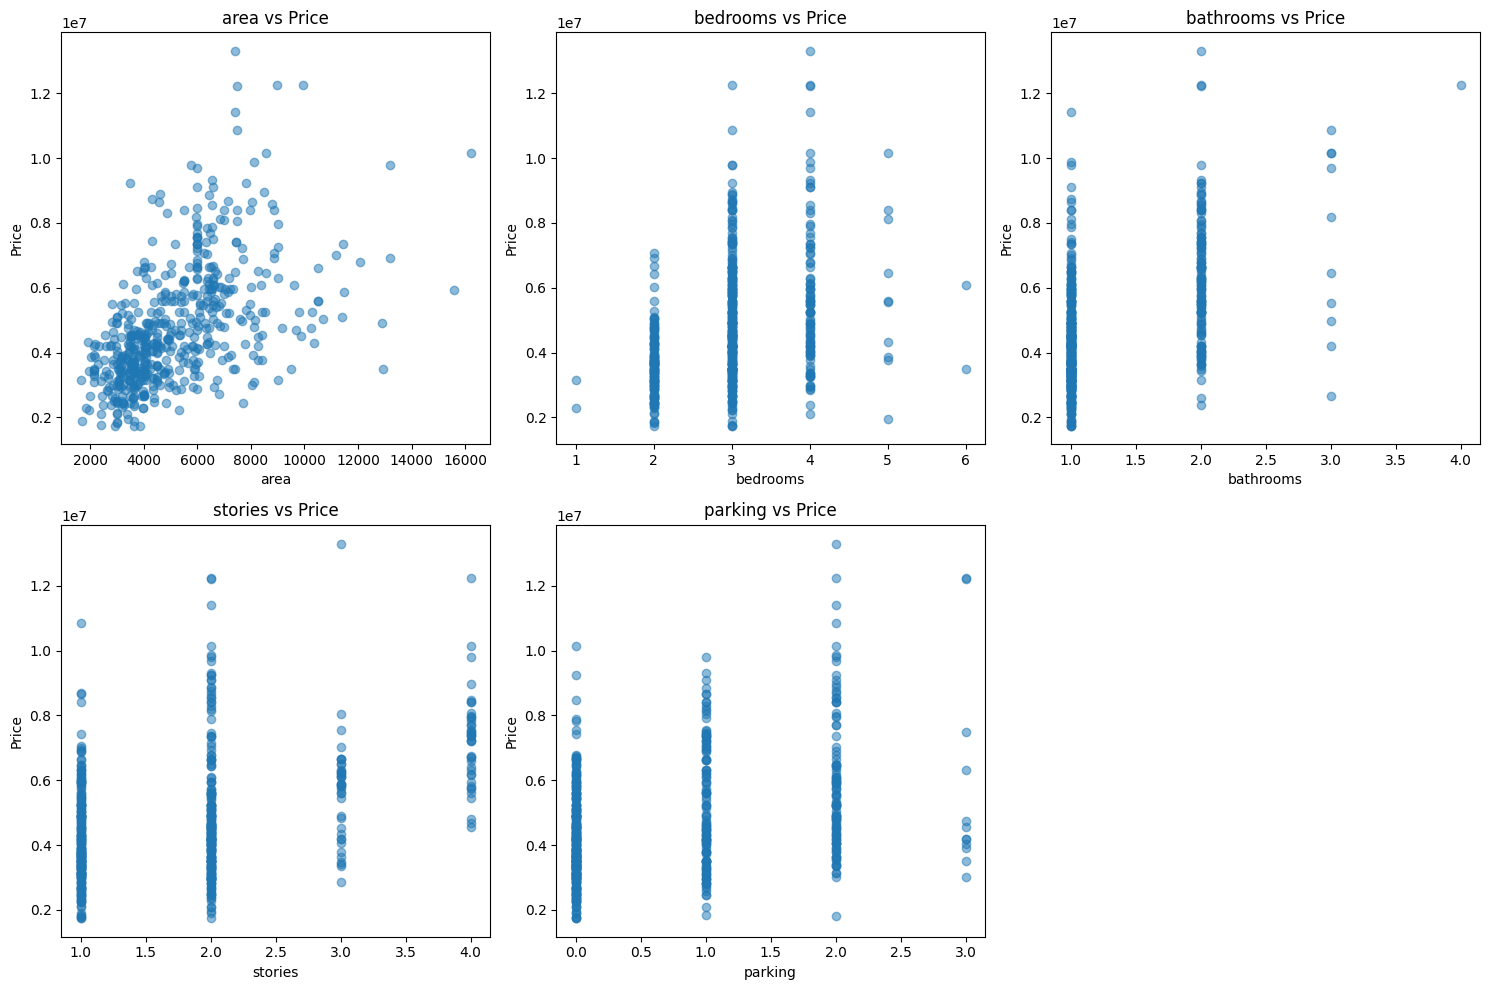

In [7]:
#6 Visualise the relationship between independent variables and dependent variable
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    plt.scatter(X[col], y, alpha=0.5)
    plt.title(f'{col} vs Price')
    plt.xlabel(col)
    plt.ylabel('Price')
plt.tight_layout()
plt.show()

In [12]:
#7 Encoding categorical data in X
categorical_cols = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [13]:
#9 Apply feature scaling on numerical variables
scaler = StandardScaler()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
X_encoded[numerical_cols] = scaler.fit_transform(X_encoded[numerical_cols])

In [14]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

In [17]:
#12 Predict on the train set and calculate the error
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_train_pred = regressor.predict(X_train)
errors_train = y_train_pred - y_train

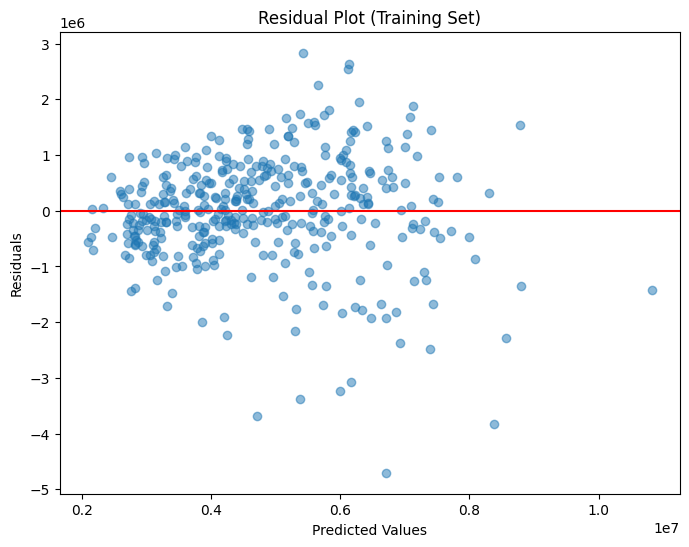

In [18]:
#13 Residual plot for training set
plt.figure(figsize=(8, 6))
plt.scatter(y_train_pred, errors_train, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot (Training Set)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [19]:
#14 Predict on the test set
y_test_pred = regressor.predict(X_test)
errors_test = y_test_pred - y_test

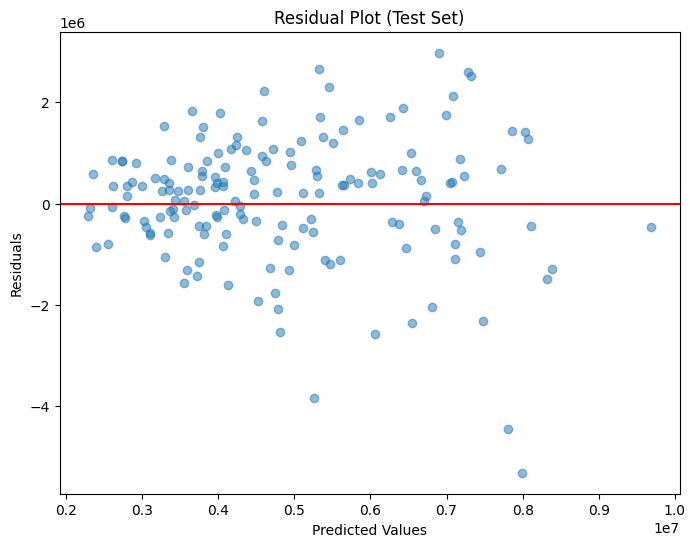

In [20]:
#15 Residual plot for test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred, errors_test, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot (Test Set)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [21]:
#16 Print Mean Squared Error and R Squared Value
print("\nTraining Set Metrics:")
print("Mean Squared Error:", mean_squared_error(y_train, y_train_pred))
print("R Squared Value:", r2_score(y_train, y_train_pred))

print("\nTest Set Metrics:")
print("Mean Squared Error:", mean_squared_error(y_test, y_test_pred))
print("R Squared Value:", r2_score(y_test, y_test_pred))


Training Set Metrics:
Mean Squared Error: 963835379828.3597
R Squared Value: 0.6931989807027312

Test Set Metrics:
Mean Squared Error: 1523019469501.291
R Squared Value: 0.6463350878895877


In [22]:
#17 Check Adjusted R Squared Value
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

n_train = X_train.shape[0]  # number of observations in training set
p_train = X_train.shape[1]  # number of predictors

n_test = X_test.shape[0]    # number of observations in test set
p_test = X_test.shape[1]    # number of predictors (same as p_train)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nAdjusted R Squared Values:")
print("Training Set:", adjusted_r2(train_r2, n_train, p_train))
print("Test Set:", adjusted_r2(test_r2, n_test, p_test))

# To check with different number of input variables, we could select a subset of features
# and repeat the process to see how adjusted R-squared changes


Adjusted R Squared Values:
Training Set: 0.6823313696649533
Test Set: 0.6156841288400186
